Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.47      0.55      2390
           1       0.70      0.83      0.76      3513

    accuracy                           0.69      5903
   macro avg       0.68      0.65      0.66      5903
weighted avg       0.68      0.69      0.68      5903

Confusion Matrix:
[[1130 1260]
 [ 582 2931]]
ROC AUC Score: 0.730


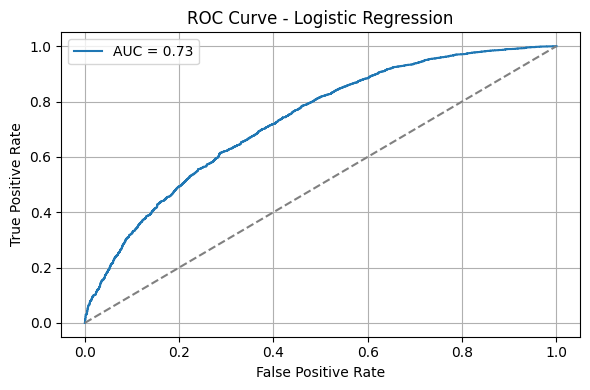

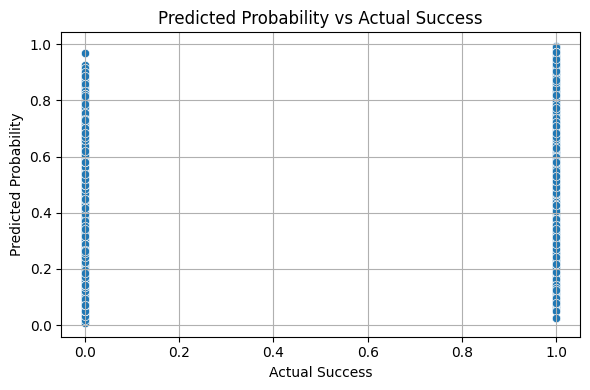

C:\Users\kevdr\AppData\Local\Temp\ipykernel_11656\661027131.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(30), y="feature", x="coefficient", palette="coolwarm")


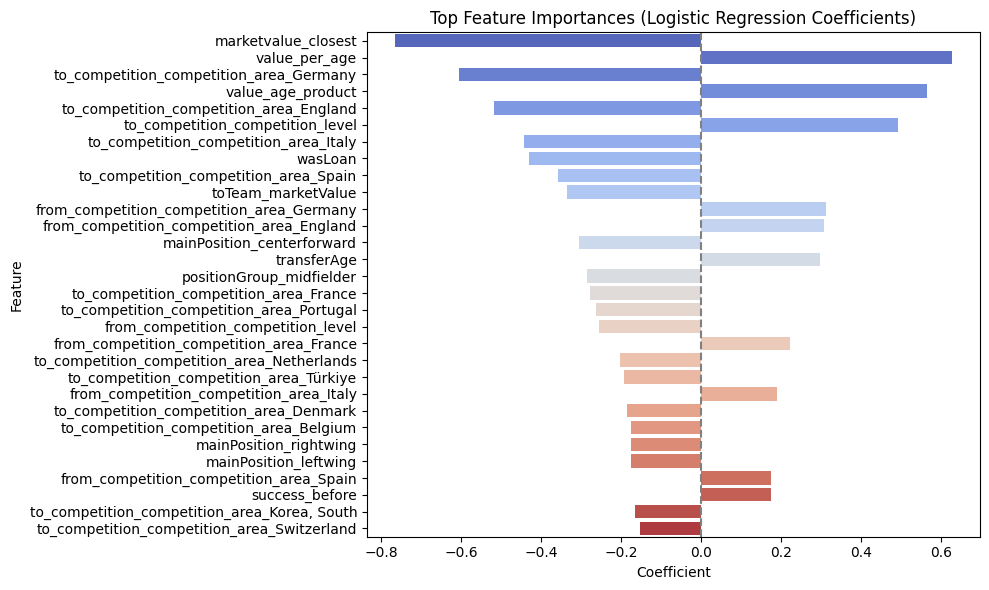

                                         feature  coefficient  abs_importance
5                            marketvalue_closest    -0.766694        0.766694
14                                 value_per_age     0.627386        0.627386
92       to_competition_competition_area_Germany    -0.606364        0.606364
13                             value_age_product     0.564051        0.564051
87       to_competition_competition_area_England    -0.519572        0.519572
9               to_competition_competition_level     0.491890        0.491890
97         to_competition_competition_area_Italy    -0.443353        0.443353
3                                        wasLoan    -0.430572        0.430572
118        to_competition_competition_area_Spain    -0.359545        0.359545
10                            toTeam_marketValue    -0.335959        0.335959
46     from_competition_competition_area_Germany     0.310966        0.310966
41     from_competition_competition_area_England     0.306401   

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("data//final_dataset.csv") 

# Feature selection
features = [
    'height', 'mainPosition', 'positionGroup', 'foot', 'transferAge',
    'isLoan', 'wasLoan', 'was_joker', 'marketvalue_closest', 'foreign_transfer',
    'from_competition_competition_area', 'from_competition_competition_level',
    'fromTeam_marketValue', 'to_competition_competition_area',
    'to_competition_competition_level', 'toTeam_marketValue',
    'team_market_value_relation', 'success', 'success_before',
    'scorer_before_grouped_category', 'clean_sheets_before_grouped','value_age_product', 'value_per_age'
]

# Select relevant data and drop missing values
df_model = df[features].copy()
df_model = df_model.dropna()

# One-hot encoding for categorical features
categorical_columns = [
    'mainPosition', 'positionGroup', 'foot',
    'from_competition_competition_area', 'to_competition_competition_area',
    'scorer_before_grouped_category', 'clean_sheets_before_grouped'
]
df_model = pd.get_dummies(df_model, columns=categorical_columns, drop_first=True)

# Features and target
X = df_model.drop(columns=["success"])
y = df_model["success"].astype(int)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predicted vs actual plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_proba)
plt.xlabel("Actual Success")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probability vs Actual Success")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importance
feature_names = X.columns
coefs = model.coef_[0]
importance_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_importance": np.abs(coefs)
}).sort_values(by="abs_importance", ascending=False)

# Barplot of top 30 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(30), y="feature", x="coefficient", palette="coolwarm")
plt.title("Top Feature Importances (Logistic Regression Coefficients)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# Print top 20 features
print(importance_df.head(20))